In [54]:
import numpy as np
import pandas as pd

In [55]:
data_raw = pd.read_parquet("datasets/data-0-1.parquet.gzip")

drop_columns = ["ebs_Q_Charge", "ebs_Q_Discharge", "BCM_ebs_I_BATT", "dcdc_OverTemperature","IC_LowBatteryvoltage", "DCDC_realInputVoltage", "DCDC_realInputCurrent"]
data_raw = data_raw.drop(columns=drop_columns)
data_raw.describe()

data = data_raw[data_raw.BCM_ebs_U_BATT >= 10.]

In [56]:
pd.DataFrame(data["BCM_ebs_U_BATT"].value_counts()).sort_values(by='BCM_ebs_U_BATT')

,count
BCM_ebs_U_BATT,
10.215820,1
10.464844,1
10.516602,1
10.858398,1
11.929688,1
...,...
14.243164,318
14.244141,279
14.245117,139


In [57]:
# 找到两条数据
# LM8F7D992MAS00656 1681713513549 10.215820
# LM8F7D898MA008093 1681715192990 10.464844
data[data["BCM_ebs_U_BATT"] < 10.5]

,vin,collect_ts,uuid,model_name,series_code,msg_create_time,BCM_ebs_U_BATT,BCM_ebs_SOC,BCM_ebs_SOH_SUL,BCM_ebs_SOC_STATE,...,DCDC_MaxPwrTime,vcu_dcdc_enable,vcu_dcdc_voltageReq,DCDC_MCU_HVIL_Warning,DCDC_BMS_HVIL_Warning,DCDC_HV_InterlockStatus1,DCDC_HV_InterlockStatus,dcdc_systemStatus,dcdc_deratingStatus,dcdc_realTemperature
24514,LM8F7D992MAS00656,1681713513549,LM8F7D992MAS00656#1681713514619#9064,B24DRF8JP2L01,SERES-X1,1681713514054,10.215820,21.0,100.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,33.0
46932,LM8F7D898MA008093,1681715192990,LM8F7D898MA008093#1681715195334#1544,B24DRF6EP2L01,SERES-X1,1681715194750,10.464844,90.0,100.0,1.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,37.0


In [58]:
# 按照时间排序
MAS00656 = data[data.vin == "LM8F7D992MAS00656"].sort_values(by = 'collect_ts')
MA008093 = data[data.vin == "LM8F7D898MA008093"].sort_values(by = 'collect_ts')

In [59]:
MAS00656

,vin,collect_ts,uuid,model_name,series_code,msg_create_time,BCM_ebs_U_BATT,BCM_ebs_SOC,BCM_ebs_SOH_SUL,BCM_ebs_SOC_STATE,...,DCDC_MaxPwrTime,vcu_dcdc_enable,vcu_dcdc_voltageReq,DCDC_MCU_HVIL_Warning,DCDC_BMS_HVIL_Warning,DCDC_HV_InterlockStatus1,DCDC_HV_InterlockStatus,dcdc_systemStatus,dcdc_deratingStatus,dcdc_realTemperature
23843,LM8F7D992MAS00656,1681713433549,LM8F7D992MAS00656#1681713434584#2016,B24DRF8JP2L01,SERES-X1,1681713434044,14.125977,80.0,100.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,33.0
23900,LM8F7D992MAS00656,1681713443549,LM8F7D992MAS00656#1681713444628#5127,B24DRF8JP2L01,SERES-X1,1681713444043,14.124023,80.0,100.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,33.0
23951,LM8F7D992MAS00656,1681713453549,LM8F7D992MAS00656#1681713454415#732,B24DRF8JP2L01,SERES-X1,1681713454063,14.121094,80.0,100.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,33.0
24078,LM8F7D992MAS00656,1681713463549,LM8F7D992MAS00656#1681713464639#7347,B24DRF8JP2L01,SERES-X1,1681713464053,14.126953,80.0,100.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,33.0
24178,LM8F7D992MAS00656,1681713473549,LM8F7D992MAS00656#1681713474646#6504,B24DRF8JP2L01,SERES-X1,1681713474104,14.124023,80.0,100.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,33.0
24246,LM8F7D992MAS00656,1681713483549,LM8F7D992MAS00656#1681713484649#583,B24DRF8JP2L01,SERES-X1,1681713484055,14.118164,80.0,100.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,33.0
24393,LM8F7D992MAS00656,1681713493549,LM8F7D992MAS00656#1681713494599#6782,B24DRF8JP2L01,SERES-X1,1681713494054,12.928711,80.0,100.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,33.0
24471,LM8F7D992MAS00656,1681713503549,LM8F7D992MAS00656#1681713504718#5230,B24DRF8JP2L01,SERES-X1,1681713504104,10.858398,56.0,100.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,33.0
24514,LM8F7D992MAS00656,1681713513549,LM8F7D992MAS00656#1681713514619#9064,B24DRF8JP2L01,SERES-X1,1681713514054,10.215820,21.0,100.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,33.0


In [60]:
MA008093

,vin,collect_ts,uuid,model_name,series_code,msg_create_time,BCM_ebs_U_BATT,BCM_ebs_SOC,BCM_ebs_SOH_SUL,BCM_ebs_SOC_STATE,...,DCDC_MaxPwrTime,vcu_dcdc_enable,vcu_dcdc_voltageReq,DCDC_MCU_HVIL_Warning,DCDC_BMS_HVIL_Warning,DCDC_HV_InterlockStatus1,DCDC_HV_InterlockStatus,dcdc_systemStatus,dcdc_deratingStatus,dcdc_realTemperature
155,LM8F7D898MA008093,1681709144660,LM8F7D898MA008093#1681709147234#2250,B24DRF6EP2L01,SERES-X1,1681709147036,14.221680,67.0,100.0,1.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,40.0
275,LM8F7D898MA008093,1681709154660,LM8F7D898MA008093#1681709157824#4618,B24DRF6EP2L01,SERES-X1,1681709157275,14.220703,67.0,100.0,1.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,41.0
361,LM8F7D898MA008093,1681709164660,LM8F7D898MA008093#1681709167360#2342,B24DRF6EP2L01,SERES-X1,1681709167043,14.219727,67.0,100.0,1.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,40.0
476,LM8F7D898MA008093,1681709174660,LM8F7D898MA008093#1681709177346#7629,B24DRF6EP2L01,SERES-X1,1681709177223,14.219727,67.0,100.0,1.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,40.0
580,LM8F7D898MA008093,1681709184660,LM8F7D898MA008093#1681709187366#5618,B24DRF6EP2L01,SERES-X1,1681709187063,14.220703,67.0,100.0,1.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71404,LM8F7D898MA008093,1681719448697,LM8F7D898MA008093#1681719449831#1756,B24DRF6EP2L01,SERES-X1,1681719449290,14.217773,81.0,100.0,1.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,40.0
71489,LM8F7D898MA008093,1681719458697,LM8F7D898MA008093#1681719459939#4639,B24DRF6EP2L01,SERES-X1,1681719459386,14.218750,81.0,100.0,1.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,41.0
71578,LM8F7D898MA008093,1681719468697,LM8F7D898MA008093#1681719469847#9518,B24DRF6EP2L01,SERES-X1,1681719469324,14.218750,81.0,100.0,1.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,40.0
71675,LM8F7D898MA008093,1681719478697,LM8F7D898MA008093#1681719479655#6749,B24DRF6EP2L01,SERES-X1,1681719479092,14.218750,81.0,100.0,1.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,40.0


In [61]:
# 按照 BCM_ebs_U_BATT 进行排序统计每个电压值的数据量
pd.DataFrame(MA008093["BCM_ebs_U_BATT"].value_counts()).sort_values(by='BCM_ebs_U_BATT')

,count
BCM_ebs_U_BATT,
10.464844,1
10.516602,1
12.889648,1
12.915039,1
13.017578,1
13.031250,1
13.051758,1
14.159180,1
14.161133,1


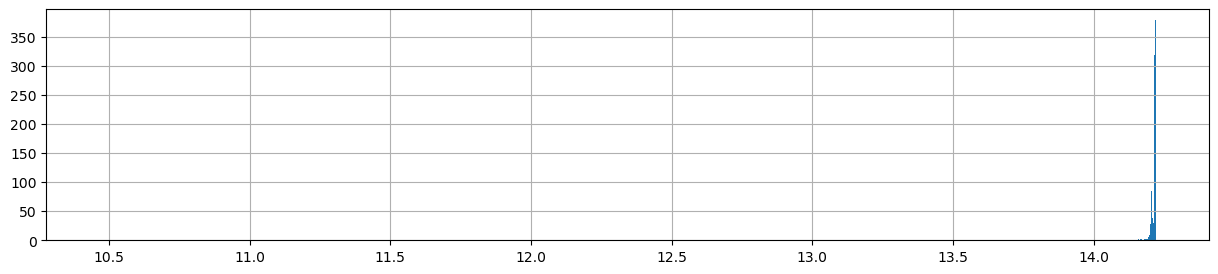

In [62]:
# 电压直方图
import matplotlib.pyplot as plt
MA008093.BCM_ebs_U_BATT.hist(bins=1000, figsize=(15,3))
plt.show()

array([[<Axes: xlabel='BCM_ebs_U_BATT', ylabel='BCM_ebs_U_BATT'>,
        <Axes: xlabel='BCM_ebs_SOC', ylabel='BCM_ebs_U_BATT'>],
       [<Axes: xlabel='BCM_ebs_U_BATT', ylabel='BCM_ebs_SOC'>,
        <Axes: xlabel='BCM_ebs_SOC', ylabel='BCM_ebs_SOC'>]], dtype=object)

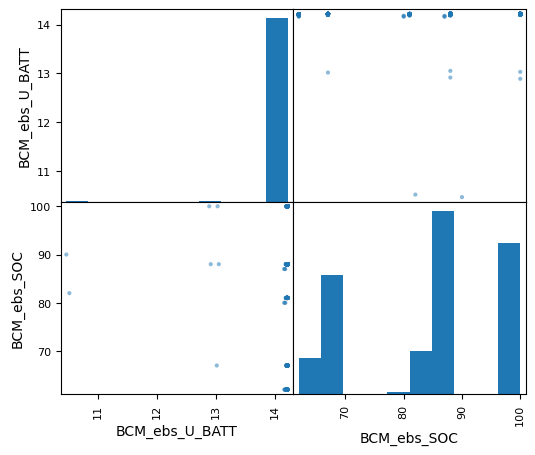

In [63]:
# soc 和 电压的关系
from  pandas.plotting import scatter_matrix

attributes = ["BCM_ebs_U_BATT", "BCM_ebs_SOC"]

scatter_matrix(MA008093[attributes], figsize=(6,5))

In [64]:
MA008093_copy = MA008093.copy()

MA008093_copy['date'] = pd.to_datetime(MA008093_copy["collect_ts"], unit='ms')
MA008093_copy.describe()

,collect_ts,BCM_ebs_U_BATT,BCM_ebs_SOC,BCM_ebs_SOH_SUL,BCM_ebs_SOC_STATE,BCM_ebs_SOH_SUL_STATE,bcm_12VBatterySOC,dcdc_realOutputVoltage,dcdc_realOutputCurrent,DCDC_AlerState,...,vcu_dcdc_enable,vcu_dcdc_voltageReq,DCDC_MCU_HVIL_Warning,DCDC_BMS_HVIL_Warning,DCDC_HV_InterlockStatus1,DCDC_HV_InterlockStatus,dcdc_systemStatus,dcdc_deratingStatus,dcdc_realTemperature,date
count,9.180000e+02,918.000000,918.000000,918.0,917.0,917.0,917.000000,918.000000,918.000000,918.0,...,0.0,0.0,918.0,918.0,918.0,918.0,918.000000,918.0,918.000000,918
mean,1.681714e+12,14.200056,84.349670,100.0,1.0,0.0,84.331512,14.085513,7.561329,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,1.992375,0.0,40.017429,2023-04-17 06:50:39.206966528
min,1.681709e+12,10.464844,62.000000,100.0,1.0,0.0,62.000000,10.300000,0.000000,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,1.000000,0.0,36.000000,2023-04-17 05:25:44.660000
25%,1.681712e+12,14.214844,67.000000,100.0,1.0,0.0,67.000000,14.100000,6.500000,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,2.000000,0.0,40.000000,2023-04-17 06:10:00.843000064
50%,1.681714e+12,14.217773,88.000000,100.0,1.0,0.0,88.000000,14.100000,6.700000,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,2.000000,0.0,40.000000,2023-04-17 06:48:13.343000064
75%,1.681717e+12,14.218750,100.000000,100.0,1.0,0.0,100.000000,14.100000,7.100000,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,2.000000,0.0,41.000000,2023-04-17 07:33:30.490000128
max,1.681719e+12,14.221680,100.000000,100.0,1.0,0.0,100.000000,14.200000,16.400000,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,2.000000,0.0,41.000000,2023-04-17 08:18:08.697000
std,2.998022e+06,0.195997,13.258308,0.0,0.0,0.0,13.255024,0.197247,2.231752,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.087037,0.0,1.334763,NaN


In [65]:
MA008093_copy = MA008093_copy.set_index("date")
MA008093_copy

,vin,collect_ts,uuid,model_name,series_code,msg_create_time,BCM_ebs_U_BATT,BCM_ebs_SOC,BCM_ebs_SOH_SUL,BCM_ebs_SOC_STATE,...,DCDC_MaxPwrTime,vcu_dcdc_enable,vcu_dcdc_voltageReq,DCDC_MCU_HVIL_Warning,DCDC_BMS_HVIL_Warning,DCDC_HV_InterlockStatus1,DCDC_HV_InterlockStatus,dcdc_systemStatus,dcdc_deratingStatus,dcdc_realTemperature
date,,,,,,,,,,,,,,,,,,,,,
2023-04-17 05:25:44.660,LM8F7D898MA008093,1681709144660,LM8F7D898MA008093#1681709147234#2250,B24DRF6EP2L01,SERES-X1,1681709147036,14.221680,67.0,100.0,1.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,40.0
2023-04-17 05:25:54.660,LM8F7D898MA008093,1681709154660,LM8F7D898MA008093#1681709157824#4618,B24DRF6EP2L01,SERES-X1,1681709157275,14.220703,67.0,100.0,1.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,41.0
2023-04-17 05:26:04.660,LM8F7D898MA008093,1681709164660,LM8F7D898MA008093#1681709167360#2342,B24DRF6EP2L01,SERES-X1,1681709167043,14.219727,67.0,100.0,1.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,40.0
2023-04-17 05:26:14.660,LM8F7D898MA008093,1681709174660,LM8F7D898MA008093#1681709177346#7629,B24DRF6EP2L01,SERES-X1,1681709177223,14.219727,67.0,100.0,1.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,40.0
2023-04-17 05:26:24.660,LM8F7D898MA008093,1681709184660,LM8F7D898MA008093#1681709187366#5618,B24DRF6EP2L01,SERES-X1,1681709187063,14.220703,67.0,100.0,1.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17 08:17:28.697,LM8F7D898MA008093,1681719448697,LM8F7D898MA008093#1681719449831#1756,B24DRF6EP2L01,SERES-X1,1681719449290,14.217773,81.0,100.0,1.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,40.0
2023-04-17 08:17:38.697,LM8F7D898MA008093,1681719458697,LM8F7D898MA008093#1681719459939#4639,B24DRF6EP2L01,SERES-X1,1681719459386,14.218750,81.0,100.0,1.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,41.0
2023-04-17 08:17:48.697,LM8F7D898MA008093,1681719468697,LM8F7D898MA008093#1681719469847#9518,B24DRF6EP2L01,SERES-X1,1681719469324,14.218750,81.0,100.0,1.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,40.0


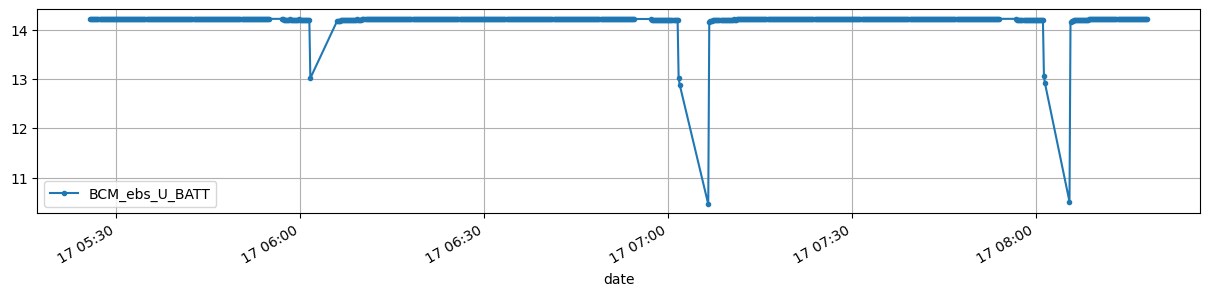

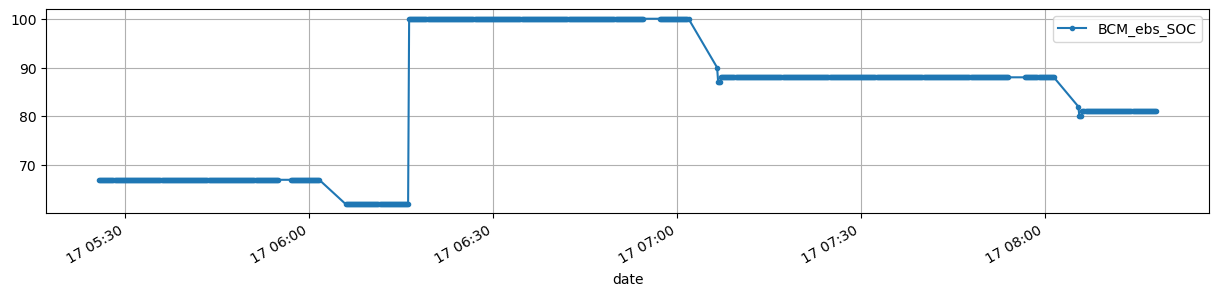

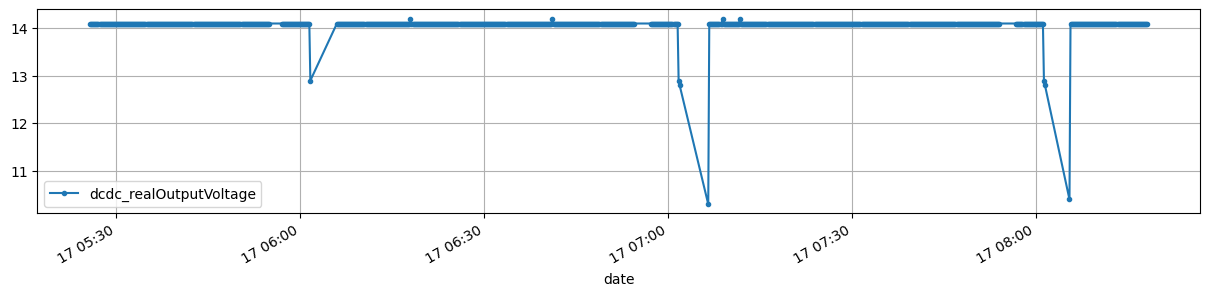

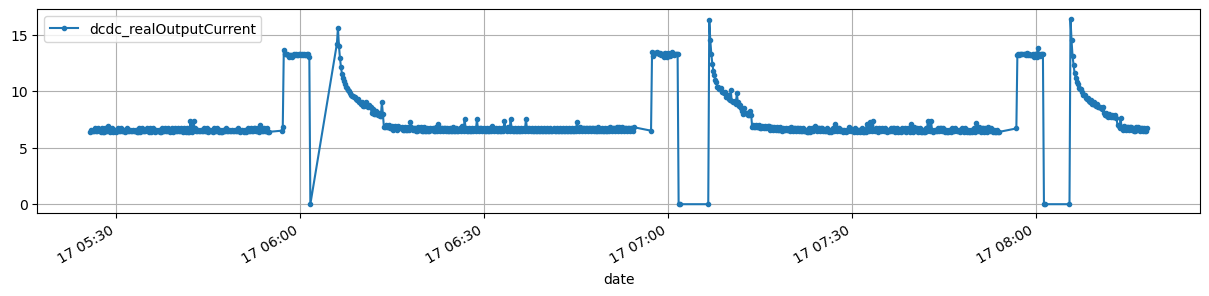

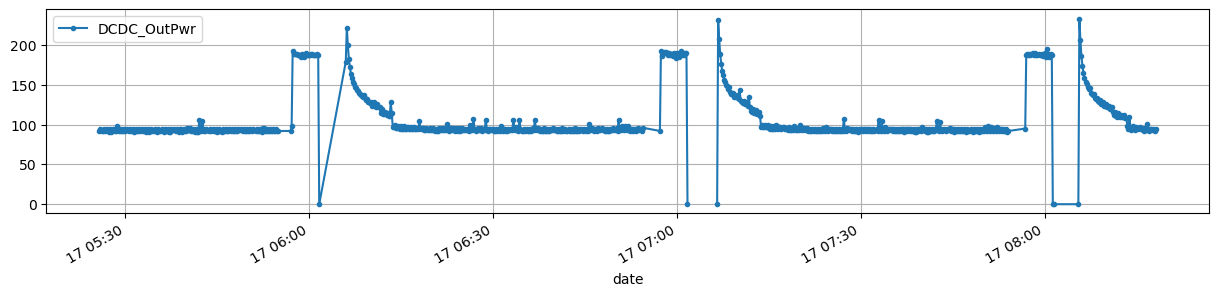

In [71]:
import matplotlib.pyplot as plt

MA008093_copy[["BCM_ebs_U_BATT"]].plot(grid=True, marker=".", figsize=(15, 3))
MA008093_copy[["BCM_ebs_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))
MA008093_copy[["dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))
MA008093_copy[["dcdc_realOutputCurrent"]].plot(grid=True, marker=".", figsize=(15, 3))
MA008093_copy[["DCDC_OutPwr"]].plot(grid=True, marker=".", figsize=(15, 3))
 # extra code – saves the figure for the book
plt.show()